In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random

In [2]:
dataset = os.path.join("/content/drive/MyDrive/datasets/Google Brain - Ventilator Pressure Prediction")

In [3]:
train_dataset = pd.read_csv(os.path.join(dataset, "train.csv"))
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [4]:
test_dataset = pd.read_csv(os.path.join(dataset, "test.csv"))
test_dataset.head(n=400)

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
395,396,31,20,50,2.552009,4.977700,1
396,397,31,20,50,2.586213,4.981205,1
397,398,31,20,50,2.620192,4.984142,1
398,399,31,20,50,2.654192,4.986621,1


In [5]:
np.unique(train_dataset['breath_id'], return_counts = True)

(array([     1,      2,      3, ..., 125743, 125745, 125749]),
 array([80, 80, 80, ..., 80, 80, 80]))

In [6]:
final_dataset = train_dataset.groupby('breath_id')
final_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


In [7]:
data = train_dataset.groupby(["breath_id"])
data.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


In [8]:
train_dataset['un_in_std'] = data['u_in'].transform(lambda x: (x - x.mean()) / x.std())
train_dataset['time_step_std'] = data['time_step'].transform(lambda x: (x - x.mean()) / x.std())

In [9]:
train_dataset['time_step_after'] = data[['time_step_std']].shift()
train_dataset['u_in_after'] = data[['un_in_std']].shift()
train_dataset['u_out_after'] = data[['u_out']].shift()
train_dataset['time_step_back'] = data[['time_step_std']].shift(-1)
train_dataset['u_in_back'] = data[['un_in_std']].shift(-1)
train_dataset['u_out_back'] = data[['u_out']].shift(-1)
train_dataset['time_step_after2'] = data[['time_step_std']].shift(2)
train_dataset['u_in_after2'] = data[['un_in_std']].shift(2)
train_dataset['u_out_after2'] = data[['u_out']].shift(2)
train_dataset['time_step_back2'] = data[['time_step_std']].shift(-2)
train_dataset['u_in_back2'] = data[['un_in_std']].shift(-2)
train_dataset['u_out_back2'] = data[['u_out']].shift(-2)
train_dataset['time_step_after3'] = data[['time_step_std']].shift(3)
train_dataset['u_in_after3'] = data[['un_in_std']].shift(3)
train_dataset['u_out_after3'] = data[['u_out']].shift(3)
train_dataset['time_step_back3'] = data[['time_step_std']].shift(-3)
train_dataset['u_in_back3'] = data[['un_in_std']].shift(-3)
train_dataset['u_out_back3'] = data[['u_out']].shift(-3)
train_dataset['time_step_after4'] = data[['time_step_std']].shift(4)
train_dataset['u_in_after4'] = data[['un_in_std']].shift(4)
train_dataset['u_out_after4'] = data[['u_out']].shift(4)
train_dataset['time_step_back4'] = data[['time_step_std']].shift(-4)
train_dataset['u_in_back4'] = data[['un_in_std']].shift(-4)
train_dataset['u_out_back4'] = data[['u_out']].shift(-4)
train_dataset['time_step_after5'] = data[['time_step_std']].shift(5)
train_dataset['u_in_after5'] = data[['un_in_std']].shift(5)
train_dataset['u_out_after5'] = data[['u_out']].shift(5)
train_dataset['time_step_back5'] = data[['time_step_std']].shift(-5)
train_dataset['u_in_back5'] = data[['un_in_std']].shift(-5)
train_dataset['u_out_back5'] = data[['u_out']].shift(-5)

In [10]:
train_dataset.fillna(0, inplace = True)
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,un_in_std,time_step_std,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,1,1,20,50,0.000000,0.083334,0,5.837492,-0.993975,-1.699182,...,0.0,-1.527627,1.502404,0.0,0.0,0.0,0.0,-1.484734,1.690480,0.0
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.813641,-1.656655,...,0.0,-1.484734,1.690480,0.0,0.0,0.0,0.0,-1.441756,1.677403,0.0
2,3,1,20,50,0.067514,22.509278,0,7.876254,1.221224,-1.613864,...,0.0,-1.441756,1.677403,0.0,0.0,0.0,0.0,-1.398771,1.645819,0.0
3,4,1,20,50,0.101542,22.808822,0,11.742872,1.250813,-1.570863,...,0.0,-1.398771,1.645819,0.0,0.0,0.0,0.0,-1.355737,1.750226,0.0
4,5,1,20,50,0.135756,25.355850,0,12.234987,1.502404,-1.527627,...,0.0,-1.355737,1.750226,0.0,0.0,0.0,0.0,-1.312828,1.794510,0.0


In [11]:
features = train_dataset.drop(['pressure', 'id', 'breath_id', 'u_in', 'time_step'], axis = 1)
target = train_dataset['pressure']

features.head()

,R,C,u_out,un_in_std,time_step_std,time_step_after,u_in_after,u_out_after,time_step_back,u_in_back,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,20,50,0,-0.993975,-1.699182,0.000000,0.000000,0.0,-1.656655,0.813641,...,0.0,-1.527627,1.502404,0.0,0.0,0.0,0.0,-1.484734,1.690480,0.0
1,20,50,0,0.813641,-1.656655,-1.699182,-0.993975,0.0,-1.613864,1.221224,...,0.0,-1.484734,1.690480,0.0,0.0,0.0,0.0,-1.441756,1.677403,0.0
2,20,50,0,1.221224,-1.613864,-1.656655,0.813641,0.0,-1.570863,1.250813,...,0.0,-1.441756,1.677403,0.0,0.0,0.0,0.0,-1.398771,1.645819,0.0
3,20,50,0,1.250813,-1.570863,-1.613864,1.221224,0.0,-1.527627,1.502404,...,0.0,-1.398771,1.645819,0.0,0.0,0.0,0.0,-1.355737,1.750226,0.0
4,20,50,0,1.502404,-1.527627,-1.570863,1.250813,0.0,-1.484734,1.690480,...,0.0,-1.355737,1.750226,0.0,0.0,0.0,0.0,-1.312828,1.794510,0.0


In [12]:
features = np.array(features)
features.shape

(6036000, 35)

In [13]:
features = features.reshape(int(features.shape[0]/80), 80, features.shape[1])
features.shape

(75450, 80, 35)

##Deep Learning Model

In [14]:
norm = tf.keras.layers.Normalization(input_shape = [80, features.shape[2],], axis = -1)
norm.adapt(features)

In [15]:
m = tf.keras.Sequential([
    norm,
    tf.keras.layers.Conv1D(128, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(80,)
])
m.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "mae")

In [16]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 80, 35)            71        
 on)                                                             
                                                                 
 conv1d (Conv1D)             (None, 78, 128)           13568     
                                                                 
 max_pooling1d (MaxPooling1  (None, 39, 128)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 39, 128)           512       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 256)           98560     
                                                        

##Training Model

In [17]:
history = m.fit(features, target, validation_split = 0.2, epochs = 10, batch_size = 512,
                callbacks = [tf.keras.callbacks.EarlyStopping(patience = 260,
                                                              monitor = 'val_loss',
                                                              mode = 'min',
                                                              restore_best_weights=True)])

Epoch 1/10
118/118 [==============================] - 21s 65ms/step - loss: 6.0935 - val_loss: 5.2837
Epoch 2/10
118/118 [==============================] - 5s 39ms/step - loss: 5.4169 - val_loss: 5.2666
Epoch 3/10
118/118 [==============================] - 5s 43ms/step - loss: 5.3513 - val_loss: 5.2524
Epoch 4/10
118/118 [==============================] - 5s 39ms/step - loss: 5.3242 - val_loss: 5.2511
Epoch 5/10
118/118 [==============================] - 5s 40ms/step - loss: 5.3048 - val_loss: 5.2646
Epoch 6/10
118/118 [==============================] - 5s 41ms/step - loss: 5.2962 - val_loss: 5.2567
Epoch 7/10
118/118 [==============================] - 5s 40ms/step - loss: 5.2907 - val_loss: 5.2509
Epoch 8/10
118/118 [==============================] - 5s 40ms/step - loss: 5.2869 - val_loss: 5.2587
Epoch 9/10
118/118 [==============================] - 5s 41ms/step - loss: 5.2820 - val_loss: 5.2507
Epoch 10/10
118/118 [==============================] - 5s 40ms/step - loss: 5.2802 - val_l

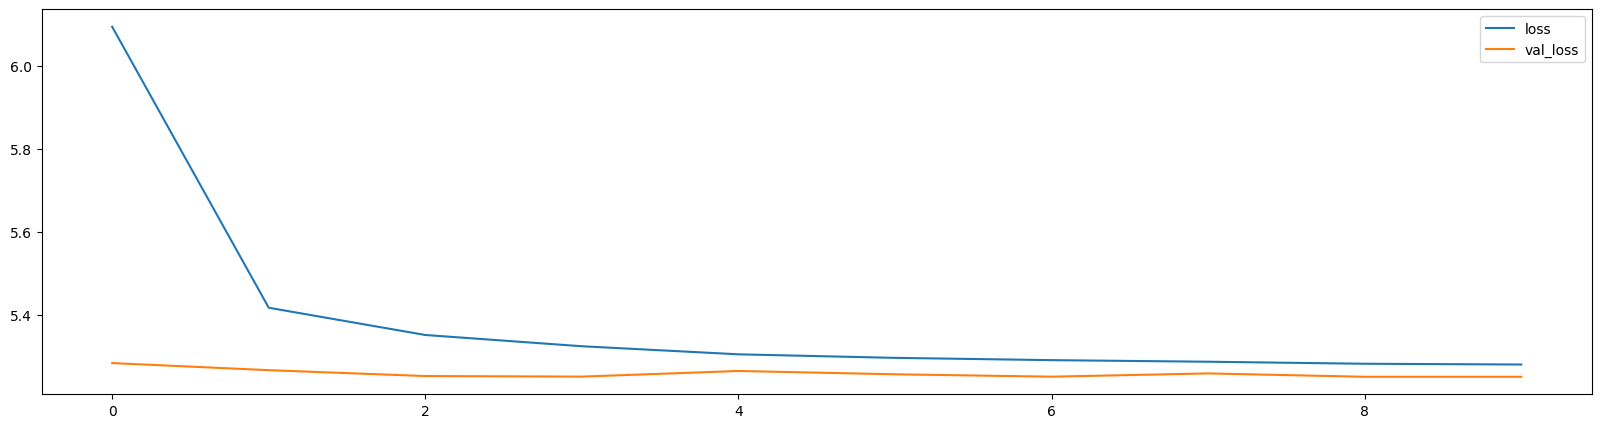

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

In [19]:
batch_size = 512
num_samples = features.shape[0]
num_batches = num_samples // batch_size

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_features = features[start_idx:end_idx]
    batch_target = target[start_idx:end_idx]

    m.evaluate(batch_features, batch_target)


16/16 [==============================] - 0s 8ms/step - loss: 6.2743


In [20]:
y_pred = m.predict(features, batch_size = 512)

148/148 [==============================] - 4s 15ms/step


In [21]:
def draw_result(start, end, target, y_pred):
  plt.figure(figsize = (20, 7))
  plt.plot(np.reshape(target[start:end], -1), linewidth=5, label = "actual Pressure values")
  plt.plot(np.reshape(y_pred[start:end], -1), linewidth=2, label = "predict Pressure values")
  plt.legend()

In [23]:
def create_table(target, y_pred):
  target = np.reshape(target, -1)
  y_pred = np.reshape(y_pred, -1)
  return pd.DataFrame({
      "actual Pressure values": target,
      "predict Pressure values": y_pred,
      "diff": np.abs(target - y_pred)
  })

In [25]:
create_table(target, y_pred).head(10)

,actual Pressure values,predict Pressure values,diff
0,5.837492,7.090670,1.253178
1,5.907794,7.113236,1.205442
2,7.876254,7.079870,0.796384
3,11.742872,7.076418,4.666454
4,12.234987,7.089462,5.145525
5,12.867706,7.096195,5.771511
6,14.695562,7.076047,7.619515
7,15.890699,7.093271,8.797427
8,15.539188,7.115634,8.423553
9,15.750094,7.086966,8.663129
